#### EECE 5698
# Project-1
##### Devesh Tarasia (001537213)
tarasia.dev@northeastern.edu

---
# Setup

In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [32]:
class epsilon_greedyPolicy: #For two arm bandits and fixed distributions to pull rewards from mu1 = 
  '''
  Inputs:
  eps: epsilon | 0 < eps < 1 (float)
  alpha: Learning Rate | 1 <= alpha <= 4 (int) 1: alpha=1; 2: 0.9**k; 3: alpha=1/(1+np.log(1+k)); 4: alpha=1/k (int); 5: alpha=0.1
  Q: Initial Q values (float list of size 2)
  iter: no. of iterations (int)
  '''
  def __init__(self,eps,alpha,Q,iter):
    self.eps = eps
    self.alpha = alpha
    self.actualAlpha = 0
    self.iter = iter
    self.k = 0 #Step Count
    self.k_arm = np.zeros(self.iter) #Choosen arm at each step
    self.reward = np.zeros(self.iter) #Reward at each step (int)
    self.accR =  np.zeros(self.iter) #Accumulated Reward after each step (int array)
    self.Q = np.array(Q) #Reward for each arm at a particular step
    self.mu1 = 5
    self.sigma1 = 10
    self.mu21 = 10
    self.sigma21 = 15
    self.mu22 = 4
    self.sigma22 = 10

  def choose(self):
    eVe = np.random.rand()
    if(self.eps == 0 and self.k == 0):
      arm = np.random.choice([1,2])
    elif(eVe < self.eps): #Exploration
      arm = np.random.choice([1,2]) 
    else: #Exploitation
      arm = np.argmax(self.Q) + 1

    self.k_arm[self.k-1] = arm
    
    if(self.alpha == 1):
      self.actualAlpha = 1
    elif(self.alpha == 2):
      self.actualAlpha = 0.9**(self.k+1)
    elif(self.alpha == 3):
      self.actualAlpha = 1/(1+np.log(1+self.k+1)) 
    elif(self.alpha == 4):
      self.actualAlpha = 1/(self.k+1)
    elif(self.alpha == 5):
      self.actualAlpha = 0.1

    if arm == 1:
      self.reward[self.k] = np.random.normal(self.mu1,self.sigma1)
    else:
      distChoose = np.random.rand()
      if(distChoose > 0.5):
        self.reward[self.k] = np.random.normal(self.mu22,self.sigma22)
      else:
        self.reward[self.k] = np.random.normal(self.mu21,self.sigma21)
    
    self.Q[arm-1] = self.Q[arm-1] + self.actualAlpha*(self.reward[self.k]-self.Q[arm-1])
    self.accR[self.k] = np.sum(self.reward)/(self.k+1)

  def run(self):
    for i in range(self.iter):
      self.k = i
      self.choose()


exp = 100
iters = 1000

[  0.98 -24.46]
[ 1.04 -2.66]
[ 0.23 -2.27]
[1.9  2.63]


Text(0.5, 1.0, 'Plot for alpha=1')

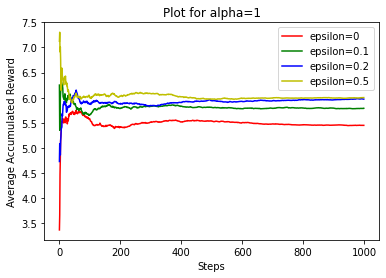

In [24]:
#(a)
Q_init = [0,0]

alpha = 1
eps00 = 0.0
eps01 = 0.1
eps02 = 0.2
eps05 = 0.5

accReward00 = np.zeros(iters)
accReward01 = np.zeros(iters)
accReward02 = np.zeros(iters)
accReward05 = np.zeros(iters)

Q00 = np.zeros(2)
Q01 = np.zeros(2)
Q02 = np.zeros(2)
Q05 = np.zeros(2)

for i in range(exp) :
  proj00 = epsilon_greedyPolicy(eps00,alpha,Q_init,iters)
  proj01 = epsilon_greedyPolicy(eps01,alpha,Q_init,iters)
  proj02 = epsilon_greedyPolicy(eps02,alpha,Q_init,iters)
  proj05 = epsilon_greedyPolicy(eps05,alpha,Q_init,iters)

  proj00.run()
  proj01.run()
  proj02.run()
  proj05.run()

  accReward00 += proj00.accR
  accReward01 += proj01.accR
  accReward02 += proj02.accR
  accReward05 += proj05.accR

  Q00 += proj00.Q
  Q01 += proj01.Q
  Q02 += proj02.Q
  Q05 += proj05.Q

accReward00 = accReward00/exp
accReward01 = accReward01/exp
accReward02 = accReward02/exp
accReward05 = accReward05/exp

Q00 = Q00/exp
Q01 = Q01/exp
Q02 = Q02/exp
Q05 = Q05/exp
print(Q00)
print(Q01)
print(Q02)
print(Q05)

plt.plot(accReward00,color="r",label='epsilon=0')
plt.plot(accReward01,color="g",label='epsilon=0.1')
plt.plot(accReward02,color="b",label='epsilon=0.2')
plt.plot(accReward05,color="y",label='epsilon=0.5')
plt.xlabel("Steps")
plt.ylabel("Average Accumulated Reward")
plt.legend()
plt.title("Plot for alpha=1")

| Epsilon-Greedy | Avg(Q(a1)) | True(Q(a1)) | Avg(Q(a2)) | True(Q(a2)) |
|----------------|------------|-------------|------------|-------------|
| epsilon=0      |  0.98      | 5           |   -24.46   | 7           |
| epsilon=0.1    |  1.04      | 5           |   -2.66    | 7           |
| epsilon=0.2    |  0.23      | 5           |    -2.27   | 7           |
| epsilon=0.5    |  1.9       | 5           |   2.63     | 7           |

For alpha=1, the learning rate is the highest. We see that with no exploration (eps=0) the accumulated reward always remains less. But when exploration is maximum (eps=0.5), I believe due to the higher learning rate, the accumulated reward also becomes high as it is able to understand the distribution better.

[-2.32 -3.01]
[-0.16  0.  ]
[0. 0.]
[0. 0.]


Text(0.5, 1.0, 'Plot for alpha=0.9^k')

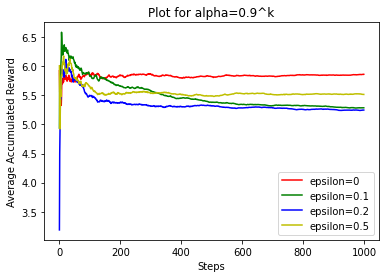

In [30]:

Q_init = [0,0]

alpha = 2
eps00 = 0.0
eps01 = 0.1
eps02 = 0.2
eps05 = 0.5

accReward00 = np.zeros(iters)
accReward01 = np.zeros(iters)
accReward02 = np.zeros(iters)
accReward05 = np.zeros(iters)

Q00 = np.zeros(2)
Q01 = np.zeros(2)
Q02 = np.zeros(2)
Q05 = np.zeros(2)


for i in range(exp) :
  proj00 = epsilon_greedyPolicy(eps00,alpha,Q_init,iters)
  proj01 = epsilon_greedyPolicy(eps01,alpha,Q_init,iters)
  proj02 = epsilon_greedyPolicy(eps02,alpha,Q_init,iters)
  proj05 = epsilon_greedyPolicy(eps05,alpha,Q_init,iters)

  proj00.run()
  proj01.run()
  proj02.run()
  proj05.run()

  accReward00 += proj00.accR
  accReward01 += proj01.accR
  accReward02 += proj02.accR
  accReward05 += proj05.accR

  Q00 += proj00.Q
  Q01 += proj01.Q
  Q02 += proj02.Q
  Q05 += proj05.Q


accReward00 = accReward00/exp
accReward01 = accReward01/exp
accReward02 = accReward02/exp
accReward05 = accReward05/exp

Q00 = Q00/exp
Q01 = Q01/exp
Q02 = Q02/exp
Q05 = Q05/exp
print(Q00)
print(Q01)
print(Q02)
print(Q05)

plt.plot(accReward00,color="r",label='epsilon=0')
plt.plot(accReward01,color="g",label='epsilon=0.1')
plt.plot(accReward02,color="b",label='epsilon=0.2')
plt.plot(accReward05,color="y",label='epsilon=0.5')
plt.xlabel("Steps")
plt.ylabel("Average Accumulated Reward")
plt.legend()
plt.title("Plot for alpha=0.9^k")

| Epsilon-Greedy | Avg(Q(a1)) | True(Q(a1)) | Avg(Q(a2)) | True(Q(a2)) |
|----------------|------------|-------------|------------|-------------|
| epsilon=0      |  -2.32     | 5           |   -3.01    | 7           |
| epsilon=0.1    |   -0.16    | 5           |        0   | 7           |
| epsilon=0.2    |    0       | 5           |      0     | 7           |
| epsilon=0.5    |     0      | 5           |       0    | 7           |

For this alpha, where the learning rate decreases with increasing steps, we see that exploitation (eps=0) gives better results as compared to any other and that becomes clear after few initial steps. 

[ 0.7  -2.91]
[0.7  1.35]
[1.48 1.92]
[1.52 2.71]


Text(0.5, 1.0, 'Plot for alpha=1/(1+ln(1+k))')

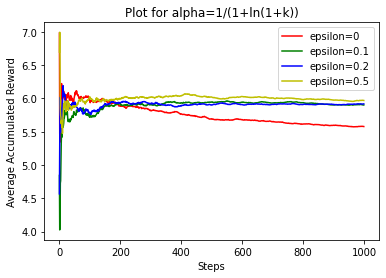

In [26]:
Q_init = [0,0]

alpha = 3
eps00 = 0.0
eps01 = 0.1
eps02 = 0.2
eps05 = 0.5

accReward00 = np.zeros(iters)
accReward01 = np.zeros(iters)
accReward02 = np.zeros(iters)
accReward05 = np.zeros(iters)

Q00 = np.zeros(2)
Q01 = np.zeros(2)
Q02 = np.zeros(2)
Q05 = np.zeros(2)


for i in range(exp) :
  proj00 = epsilon_greedyPolicy(eps00,alpha,Q_init,iters)
  proj01 = epsilon_greedyPolicy(eps01,alpha,Q_init,iters)
  proj02 = epsilon_greedyPolicy(eps02,alpha,Q_init,iters)
  proj05 = epsilon_greedyPolicy(eps05,alpha,Q_init,iters)

  proj00.run()
  proj01.run()
  proj02.run()
  proj05.run()

  accReward00 += proj00.accR
  accReward01 += proj01.accR
  accReward02 += proj02.accR
  accReward05 += proj05.accR

  Q00 += proj00.Q
  Q01 += proj01.Q
  Q02 += proj02.Q
  Q05 += proj05.Q


accReward00 = accReward00/exp
accReward01 = accReward01/exp
accReward02 = accReward02/exp
accReward05 = accReward05/exp

Q00 = Q00/exp
Q01 = Q01/exp
Q02 = Q02/exp
Q05 = Q05/exp
print(Q00)
print(Q01)
print(Q02)
print(Q05)

plt.plot(accReward00,color="r",label='epsilon=0')
plt.plot(accReward01,color="g",label='epsilon=0.1')
plt.plot(accReward02,color="b",label='epsilon=0.2')
plt.plot(accReward05,color="y",label='epsilon=0.5')
plt.xlabel("Steps")
plt.ylabel("Average Accumulated Reward")
plt.legend()
plt.title("Plot for alpha=1/(1+ln(1+k))")

| Epsilon-Greedy | Avg(Q(a1)) | True(Q(a1)) | Avg(Q(a2)) | True(Q(a2)) |
|----------------|------------|-------------|------------|-------------|
| epsilon=0      |   0.7      | 5           |   -2.91    | 7           |
| epsilon=0.1    |    0.7     | 5           |     1.35   | 7           |
| epsilon=0.2    |   1.48     | 5           |    1.92    | 7           |
| epsilon=0.5    |    1.52    | 5           |    2.71    | 7           |

In again we see that the exploration weilded much better results than just exploitation. We can see that any sort of exploration is better than just exploitation. If we plot the graph of the learning rate over steps, we see that learning rate becomes asymptotic to 0.1 thus it almost stays constant, and for this case we need exploration too for better accumulated rewards.

[-1.51 -0.75]
[0. 0.]
[0. 0.]
[0. 0.]


Text(0.5, 1.0, 'Plot for alpha=1/k')

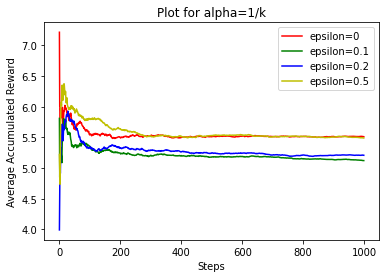

In [31]:
Q_init = [0,0]

alpha = 4
eps00 = 0.0
eps01 = 0.1
eps02 = 0.2
eps05 = 0.5

accReward00 = np.zeros(iters)
accReward01 = np.zeros(iters)
accReward02 = np.zeros(iters)
accReward05 = np.zeros(iters)

Q00 = np.zeros(2)
Q01 = np.zeros(2)
Q02 = np.zeros(2)
Q05 = np.zeros(2)


for i in range(exp) :
  proj00 = epsilon_greedyPolicy(eps00,alpha,Q_init,iters)
  proj01 = epsilon_greedyPolicy(eps01,alpha,Q_init,iters)
  proj02 = epsilon_greedyPolicy(eps02,alpha,Q_init,iters)
  proj05 = epsilon_greedyPolicy(eps05,alpha,Q_init,iters)

  proj00.run()
  proj01.run()
  proj02.run()
  proj05.run()

  accReward00 += proj00.accR
  accReward01 += proj01.accR
  accReward02 += proj02.accR
  accReward05 += proj05.accR

  Q00 += proj00.Q
  Q01 += proj01.Q
  Q02 += proj02.Q
  Q05 += proj05.Q


accReward00 = accReward00/exp
accReward01 = accReward01/exp
accReward02 = accReward02/exp
accReward05 = accReward05/exp

Q00 = Q00/exp
Q01 = Q01/exp
Q02 = Q02/exp
Q05 = Q05/exp
print(Q00)
print(Q01)
print(Q02)
print(Q05)

plt.plot(accReward00,color="r",label='epsilon=0')
plt.plot(accReward01,color="g",label='epsilon=0.1')
plt.plot(accReward02,color="b",label='epsilon=0.2')
plt.plot(accReward05,color="y",label='epsilon=0.5')
plt.xlabel("Steps")
plt.ylabel("Average Accumulated Reward")
plt.legend()
plt.title("Plot for alpha=1/k")

| Epsilon-Greedy | Avg(Q(a1)) | True(Q(a1)) | Avg(Q(a2)) | True(Q(a2)) |
|----------------|------------|-------------|------------|-------------|
| epsilon=0      |    -1.51   | 5           |    -0.75   | 7           |
| epsilon=0.1    |     0      | 5           |    0       | 7           |
| epsilon=0.2    |    0       | 5           |     0      | 7           |
| epsilon=0.5    |    0       | 5           |    0       | 7           |

Here we see that exploitation and exploration weild the highest results.

In general iterating over various alphas, I observed that only maximum exploration or exploitation weilded the higher accumulated rewards.
any ratio or exploitation vs exploration didn't weild as good a result. 
The plots with highest learning rates (alpha=1) weilded the highest accumulated reward at end.

[0.59 1.17]
[0.0059 0.0117]
[5.90e-05 1.17e-04]
[0.89 1.05]


Text(0.5, 1.0, 'Plot for Different Q values')

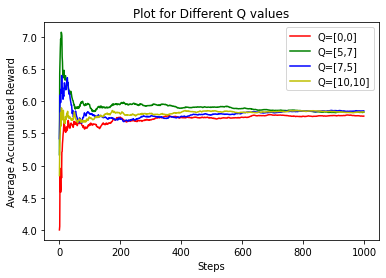

In [35]:
#(b)
Q_init1 = [0,0]
Q_init2 = [5,7]
Q_init3 = [7,5]
Q_init4 = [10,10]

alpha = 5 #Corresponds to alpha = 0.1
eps = 0.1

accReward1 = np.zeros(iters)
accReward2 = np.zeros(iters)
accReward3 = np.zeros(iters)
accReward4 = np.zeros(iters)

Q1 = np.zeros(2)
Q2 = np.zeros(2)
Q3 = np.zeros(2)
Q4 = np.zeros(2)

for i in range(exp) :
  proj1 = epsilon_greedyPolicy(eps,alpha,Q_init1,iters)
  proj2 = epsilon_greedyPolicy(eps,alpha,Q_init2,iters)
  proj3 = epsilon_greedyPolicy(eps,alpha,Q_init3,iters)
  proj4 = epsilon_greedyPolicy(eps,alpha,Q_init4,iters)

  proj1.run()
  proj2.run()
  proj3.run()
  proj4.run()

  accReward1 += proj1.accR
  accReward2 += proj2.accR
  accReward3 += proj3.accR
  accReward4 += proj4.accR

  Q1 += proj1.Q
  Q2 += proj2.Q
  Q3 += proj3.Q
  Q4 += proj4.Q

accReward1 = accReward1/exp
accReward2 = accReward2/exp
accReward3 = accReward3/exp
accReward4 = accReward4/exp

Q1 = Q1/exp
Q2 = Q1/exp
Q3 = Q2/exp
Q4 = Q4/exp

print(Q1)
print(Q2)
print(Q3)
print(Q4)

plt.plot(accReward1,color="r",label='Q=[0,0]')
plt.plot(accReward2,color="g",label='Q=[5,7]')
plt.plot(accReward3,color="b",label='Q=[7,5]')
plt.plot(accReward4,color="y",label='Q=[10,10]')
plt.xlabel("Steps")
plt.ylabel("Average Accumulated Reward")
plt.legend()
plt.title("Plot for Different Q values")

| Epsilon-Greedy | Avg(Q(a1)) | True(Q(a1)) | Avg(Q(a2)) | True(Q(a2)) |
|----------------|------------|-------------|------------|-------------|
| epsilon=0      |    0.59    | 5           |    1.17    | 7           |
| epsilon=0.1    |     0.0059 | 5           | 0.0117     | 7           |
| epsilon=0.2    |    5.9e-5  | 5           |     1.17e-4| 7           |
| epsilon=0.5    |    0.89    | 5           |   1.05     | 7           |

In this plot, we can see that the initial values greatly affect the accumulated reward in the early stages (where not much of the steps were taken up). But after a large number of steps nearing to the observed values, we see that the difference in rewards is not that much and they are more or less the same.